<a href="https://colab.research.google.com/github/MNagaSaiGanesh/Age-Calculator-1/blob/main/Customer_Churn_Prediction_for_a_Subscription-Based_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the dataset
data = pd.read_csv('Telco_customer_churn.csv')  # Replace with your dataset

In [4]:
# Display dataset information
print(data.head())
print(data.info())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles   90003.0   
1  9237-HQITU      1  United States  California  Los Angeles   90005.0   
2  9305-CDSKC      1  United States  California  Los Angeles   90006.0   
3  7892-POOKP      1  United States  California  Los Angeles   90010.0   
4  0280-XJGEX      1  United States  California  Los Angeles   90015.0   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [5]:
# List column names to verify spelling and format
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [6]:
# Handle missing values if any
# Fill missing values in numeric columns with median
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

In [7]:
# Fill missing values in non-numeric columns with mode
categorical_columns = data.select_dtypes(include=[object]).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()

In [9]:
# Automatically detect and encode categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [10]:
# Identify target column name dynamically if it's similar to 'churn'
target_column_candidates = [col for col in data.columns if 'churn' in col.lower()]
if target_column_candidates:
    target_column = target_column_candidates[0]
else:
    raise KeyError("Could not find a column related to 'churn' in the dataset.")

In [11]:
# Feature and target separation
X = data.drop(['customerID', target_column], axis=1, errors='ignore')  # Features
y = data[target_column]  # Target variable

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[438   0]
 [  0 404]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       404

    accuracy                           1.00       842
   macro avg       1.00      1.00      1.00       842
weighted avg       1.00      1.00      1.00       842


Accuracy Score: 1.0


In [17]:
# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns

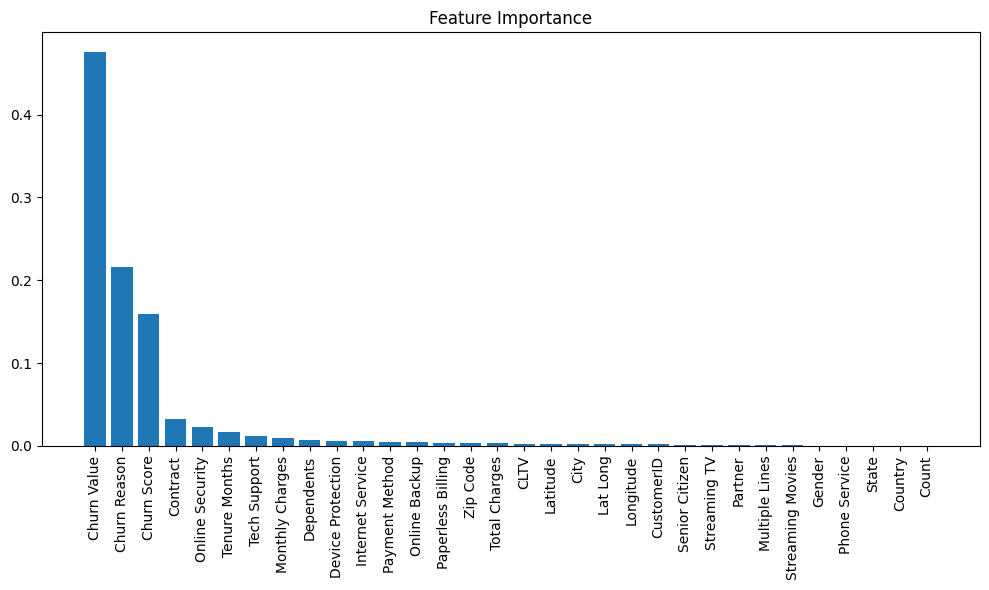

In [18]:
# Sort feature importance
sorted_indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), feature_importance[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), features[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()